In [1]:
from IPython.display import Image

# kMeans Clustering

Sources:
- Dishant kharkar, K-Means Clustering Algorithm. https://medium.com/@dishantkharkar9/k-means-clustering-algorithm-ce4fbcac8fb0
- Shishir Narkhede, Introduction to K-means Clustering: A Beginner’s Guide, https://medium.com/@narkhedeshishir2003/introduction-to-k-means-clustering-a-beginners-guide-65c42f61af5f
- Aditri Srivastava, K-means Clustering, https://medium.com/analytics-vidhya/k-means-clustering-3ce2456db7f1
- Lance Galletti, Kmeans ++ From Scratch, https://medium.com/@gallettilance/kmeans-from-scratch-24be6bee8021
- Pulkit Sharma, The Most Comprehensive Guide to K-Means Clustering You’ll Ever Need, https://medium.com/analytics-vidhya/the-most-comprehensive-guide-to-k-means-clustering-youll-ever-need-2a570ff2c0a3

**kMeans Clustering** is an unsupervised machine learning technique. It aims to partition n observations into k clusters.

kMeans algorithm is an iterative algorithm that tries to partition the dataset into K distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.

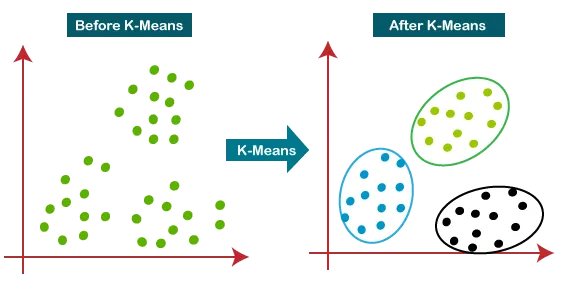

In [2]:
Image(filename="figures/kmeans1.png", width=500)

**Metric used:** **Euclidean distance**

**Main points:**
- **Intercluster distance** should be large: The distance between observations in two clusters should be High.
- **Intracluster Distance** should be small: The distance of observation within the cluster should be very less.

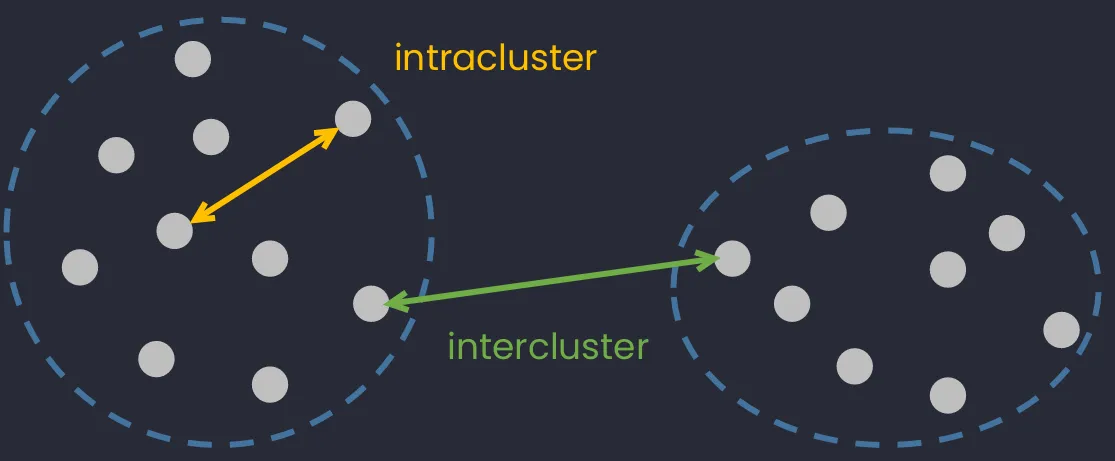

In [3]:
Image(filename="figures/kmeans2.png", width=500)

#### Applications

**Market Segmentation:**
- Segment customers based on their purchasing behavior, demographics, or preferences. 

**Document Clustering:**
- Group similar documents together, enabling efficient document organization, information retrieval, and topic modeling. 
- Applications in text mining, content recommendation, and document classification.

**Image Segmentation:**
- Partition an image into distinct regions based on color similarity. This technique is used in image processing, computer vision, and object recognition

**Anomaly Detection:** 
- Identify outliers or anomalies in a dataset by assigning them to separate clusters. 
- Applications in fraud detection, network intrusion detection, and outlier analysis.

### Drawbacks
- Sensitive to Initial Centroids: 
    * Starts by placing centroids randomly. 
    * Final clusters and results can vary based on these initial positions. 
    * In some cases, poor initial placement can lead to suboptimal or incorrect cluster assignments.

- Assumes Spherical Clusters with Equal Size: 
    * Can cause kMeans to struggle with clusters that are elongated or irregularly shaped.

- Requires Predefined Number of Clusters (K): 
    * In many cases, it’s not clear what the optimal number of clusters should be. 
    * Selecting an incorrect value for **k** can lead to inaccurate results.
    * Finding the optimal **k** using techniques like the **elbow method** is not always straightforward.

### The kMeans algorithm

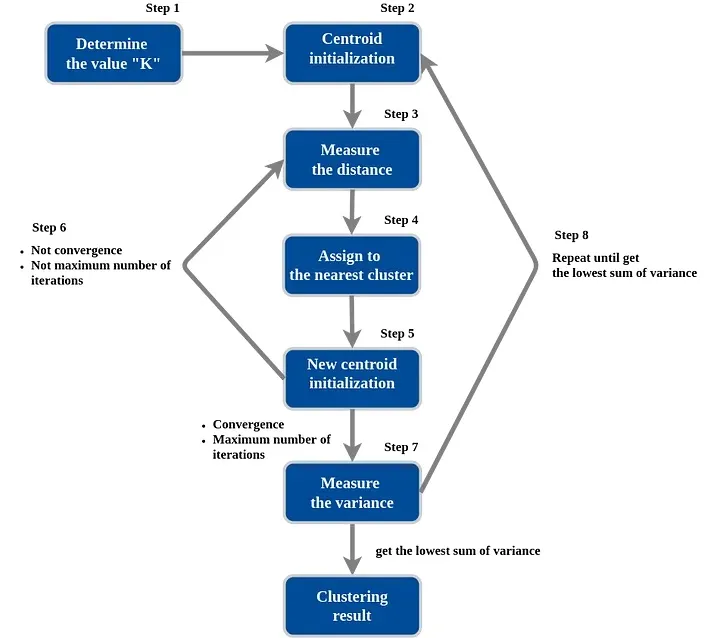

In [4]:
Image(filename="figures/kmeans5.png", width=500)

### How to select the optimal value for k?

#### Elbow Method:

**WCSS (Within Cluster Sum of Squares):** the total variations within a cluster.

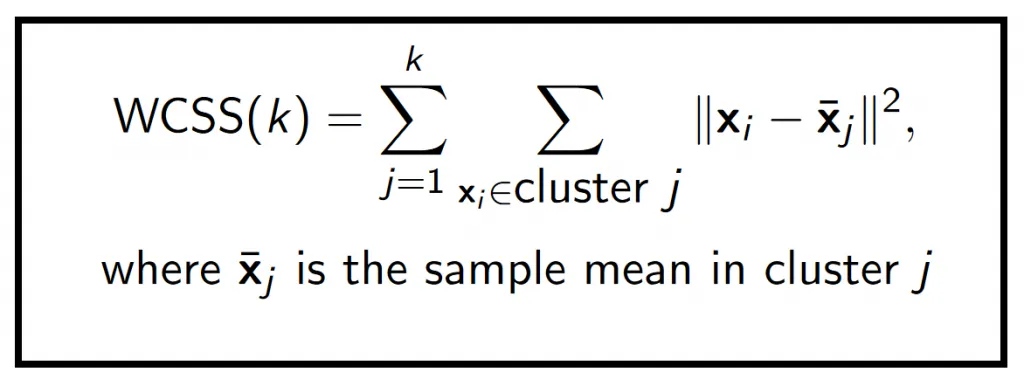

In [5]:
Image(filename="figures/kmeans6.png", width=500)

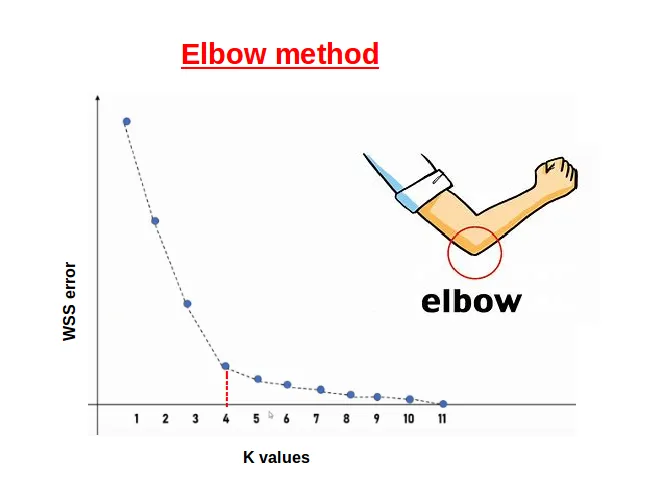

In [6]:
Image(filename="figures/kmeans4.png", width=500)

### How to evaluate kMeans Model?

#### Silhouette Coefficient

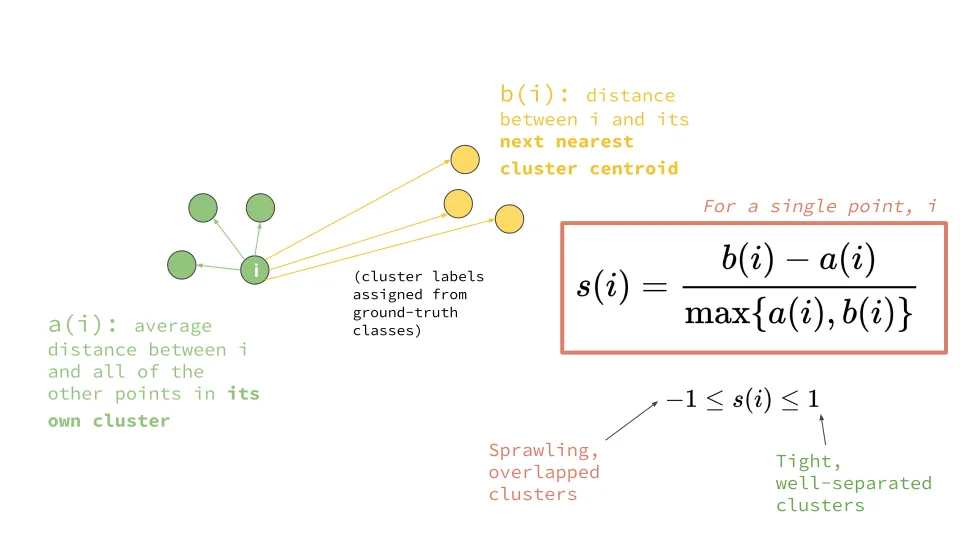

In [7]:
Image(filename="figures/kmeans3.png", width=500)

### Example:

Live Selling in Thailand
Source:
https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo?resource=download



In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

%matplotlib inline

In [9]:
df = pd.read_csv('data/Live.csv')
df.shape 

(7050, 16)

In [10]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [11]:
df.info() # View summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [12]:
df.isnull().sum() # Check for missing values in dataset

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [13]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True) 
# Drop redundant columns
df.info()   # Again view the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [14]:
len(df['status_id'].unique()) 

6997

In [15]:
len(df['status_published'].unique())

6913

In [16]:
len(df['status_type'].unique())

4

In [17]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [18]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)
# Drop status_id and status_published variable from the dataset

In [19]:
# Declare feature vector and target variable
X = df
y = df['status_type'] 

# Convert categorical variable into integers
le = LabelEncoder() 
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

In [20]:
# Feature Scaling
cols = X.columns
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

#### K-Means model with 2 clusters:

In [21]:
# kMeans model with two clusters
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [22]:
# Centroids:
kmeans.cluster_centers_

array([[9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03],
       [3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03]])

In [23]:
# Inertia: lower values of inertia are better and zero is optimal.
kmeans.inertia_

237.75726404419567

In [24]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4288 out of 7050 samples were correctly labeled.


In [25]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.61


#### Use elbow method to find optimal number of clusters:

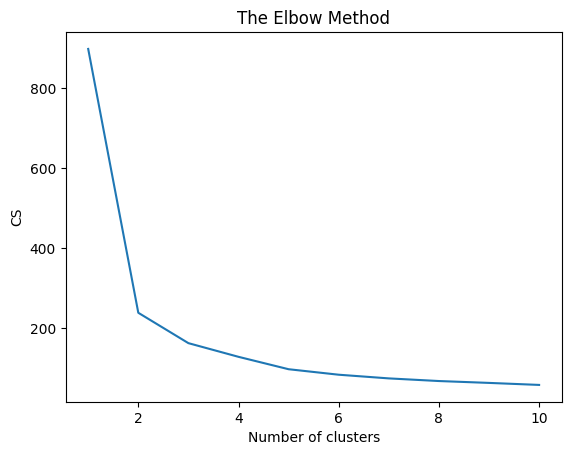

In [26]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

#### K-Means model with 3 clusters:

In [27]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4066 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


#### K-Means model with 4 clusters:

In [28]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4112 out of 7050 samples were correctly labeled.
Accuracy score: 0.58
